In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [24]:
df= pd.read_csv("/content/NSSO68 new.csv", low_memory=False)

In [25]:
print("Dataset Information:")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
   slno       grp  Round_Centre  FSU_number  Round  Schedule_Number  Sample  \
0     1  4.10E+31             1       41000     68               10       1   
1     2  4.10E+31             1       41000     68               10       1   
2     3  4.10E+31             1       41000     68               10       1   
3     4  4.10E+31             1       41000     68               10       1   
4     5  4.10E+31             1       41000     68               10       1   

   Sector  state  State_Region  ...  pickle_v  sauce_jam_v  Othrprocessed_v  \
0       2     24           242  ...       0.0          0.0              0.0   
1 

In [26]:
display(df)

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.180000
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.950000
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.840000
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.300000
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101657,101658,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,0.000000,544.013667,28.441750,J$K,2,0.000000,25.833333
101658,101659,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,8.000000,417.616600,25.490282,J$K,2,0.000000,49.000000
101659,101660,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,7.142857,378.300429,25.800107,J$K,2,0.000000,32.285714
101660,101661,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,14.000000,510.023600,30.220170,J$K,2,0.000000,39.200000


In [27]:
Orissa_data = df[df['state_1'] == 'ORI']

In [28]:
missing_values = Orissa_data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [8]:
ORI = Orissa_data[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

In [16]:
def impute_with_mean(column):
    if column.isna().sum() > 0:
        column.fillna(column.mean(), inplace=True)
    return column



In [18]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

In [23]:
outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    ORI= remove_outliers(ORI, col)


In [29]:
ORI['total_consumption'] = ORI[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

In [30]:
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)['total_consumption'].sum().reset_index()
    summary = summary.sort_values(by='total_consumption', ascending=False)
    return summary

In [31]:
district_summary = summarize_consumption(ORI, 'District')
region_summary = summarize_consumption(ORI, 'Region')

In [32]:
print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)

Top Consuming Districts:
    District  total_consumption
24        25         304.349405
25        26         300.111201
16        17         249.764232
27        28         236.991504
Region Consumption Summary:
   Region  total_consumption
1     2.0        2279.846696
2     3.0        1323.934235
0     1.0        1201.308647


In [73]:
district_mapping = {"1":"Bargarh  *",
                   "2":"Jharsuguda  *",
                   "3":"Sambalpur",
                   "4":"Debagarh  *",
                   "5":"Sundargarh",
                   "6":"Kendujhar",
                   "7":"Mayurbhanj",
                   "8":"Baleshwar",
                   "9":"Bhadrak  *",
                   "10":"Kendrapara *",
                   "11":"Jagatsinghapur  *",
                   "12":"Cuttack",
                   "13":"Jajapur  *",
                   "14":"Dhenkanal",
                   "15":"Anugul  *",
                   "16":"Nayagarh  *",
                   "17":"Khordha  *",
                   "18":"Puri",
                   "19":"Ganjam",
                   "20":"Gajapati  *",
                   "21":"Kandhamal",
                   "22":"Baudh  *",
                   "23":"Sonapur  *",
                   "24":"Balangir",
                   "25":"Nuapada  *",
                   "26":"Kalahandi",
                   "27":"Rayagada  *",
                   "28":"Nabarangapur  *",
                   "29":"Koraput",
                   "30":"Malkangiri  *"
                   }
sector_mapping = {"2": "URBAN", "1": "RURAL"}

In [74]:
ORI['District'] = ORI['District'].astype(str).map(district_mapping).fillna(ORI['District'])
ORI['Sector'] = ORI['Sector'].astype(str).map(sector_mapping).fillna(ORI['Sector'])

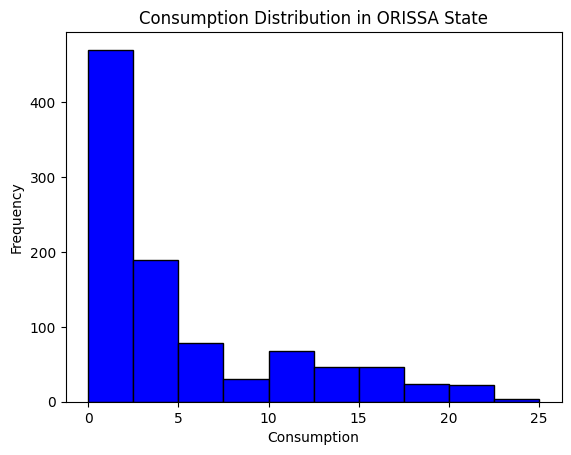

In [75]:
plt.hist(ORI['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Consumption Distribution in ORISSA State")
plt.show()

In [76]:
ori_consumption = ORI.groupby('District')['total_consumption'].sum().reset_index()

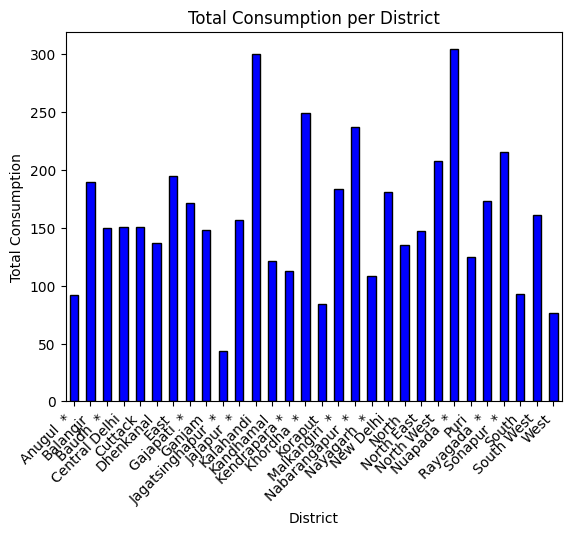

In [77]:
ori_consumption.plot(kind='bar', x='District', y='total_consumption', legend=False, color='blue', edgecolor='black')
plt.xlabel("District")
plt.ylabel("Total Consumption")
plt.title("Total Consumption per District")
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
data_map = gpd.read_file("/content/ODISHA_DISTRICTS.geojson")

In [44]:
print(data_map.columns)
print(ori_consumption.columns)

Index(['District', 'stname', 'stcode11', 'dtcode11', 'year_stat',
       'Shape_Length', 'Shape_Area', 'OBJECTID', 'test', 'Dist_LGD',
       'State_LGD', 'geometry'],
      dtype='object')
Index(['District', 'total_consumption'], dtype='object')


In [46]:
data_map['District'] = ori_consumption['District']

In [48]:
data_map_data = data_map.merge(ori_consumption, left_on='stname', right_on='District')

In [49]:
print(data_map_data)

Empty GeoDataFrame
Columns: [District_x, stname, stcode11, dtcode11, year_stat, Shape_Length, Shape_Area, OBJECTID, test, Dist_LGD, State_LGD, geometry, District_y, total_consumption]
Index: []


In [50]:
data_map = data_map.rename(columns={'stname': 'District'})

In [52]:
display(data_map)

,District,District,stcode11,dtcode11,year_stat,Shape_Length,Shape_Area,OBJECTID,test,Dist_LGD,State_LGD,geometry
0,10,ODISHA,21,378,2011_c,373396.900872,2.875538e+09,10,0,348,21,"POLYGON ((86.79471 20.73909, 86.79509 20.74028..."
1,11,ODISHA,21,383,2011_c,444270.171576,5.127622e+09,11,1,352,21,"POLYGON ((85.68363 21.18574, 85.68297 21.18648..."
2,12,ODISHA,21,382,2011_c,481374.795263,3.333572e+09,12,0,356,21,"POLYGON ((86.08468 21.16912, 86.08301 21.16920..."
3,13,ODISHA,21,392,2011_c,372435.858735,2.723055e+09,13,0,372,21,"POLYGON ((83.89755 21.17779, 83.89754 21.17780..."
4,14,ODISHA,21,394,2011_c,460259.542790,4.411778e+09,14,0,368,21,"POLYGON ((82.63817 21.08967, 82.63784 21.08970..."
5,15,ODISHA,21,393,2011_c,616441.570611,7.493608e+09,15,1,345,21,"POLYGON ((83.39207 21.06973, 83.39136 21.07098..."
6,16,ODISHA,21,391,2011_c,441865.885523,3.562376e+09,17,0,349,21,"POLYGON ((84.23043 20.89573, 84.22530 20.89600..."
7,17,ODISHA,21,381,2011_c,679379.023224,4.415655e+09,20,0,350,21,"POLYGON ((85.91653 20.70268, 85.91598 20.70284..."
8,18,ODISHA,21,390,2011_c,696490.595025,9.143814e+09,23,1,359,21,"POLYGON ((84.31835 20.68859, 84.31461 20.68959..."
9,19,ODISHA,21,385,2011_c,471128.657113,4.445520e+09,25,0,367,21,"POLYGON ((84.79134 20.58048, 84.79017 20.58123..."


In [53]:
ori_consumption = pd.read_csv("/content/NSSO68 new.csv", low_memory=False)

In [54]:
ori_consumption = ORI.groupby('District')['total_consumption'].sum().reset_index()

In [55]:
print(ori_consumption.head())

  District  total_consumption
0       10         112.396032
1       11          43.464286
2       12         150.748413
3       13         156.726732
4       14         136.905952


In [59]:
data_map = gpd.read_file("/content/ODISHA_DISTRICTS.geojson")
data_map = data_map.rename(columns={'dtname': 'total_consumption'})

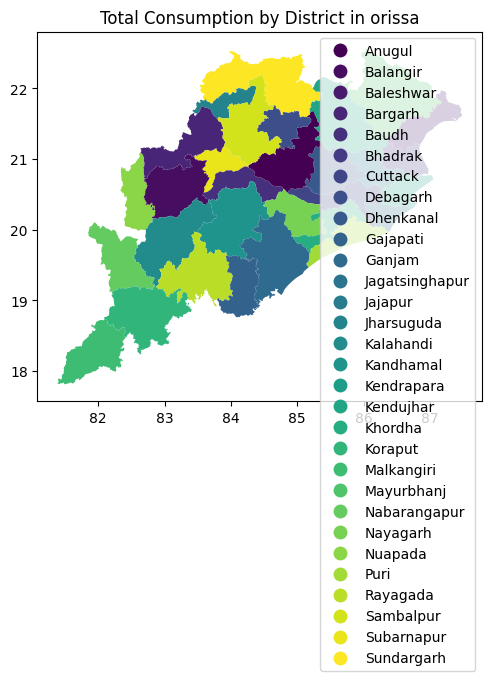

In [60]:
fig, ax = plt.subplots(1, 1)
data_map.plot(column='total_consumption', cmap='viridis', legend=True, ax=ax)
ax.set_title('Total Consumption by District in orissa')
plt.show()